In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('nilai-gizi.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        1651 non-null   object 
 1   manufacturer                1651 non-null   object 
 2   serving_size                1651 non-null   object 
 3   energy_kcal                 1651 non-null   float64
 4   protein_g                   1651 non-null   float64
 5   carbohydrate_g              1651 non-null   float64
 6   fat_g                       1651 non-null   float64
 7   sugar_g                     1651 non-null   float64
 8   sodium_mg                   1651 non-null   float64
 9   fiber_g                     1651 non-null   float64
 10  energy_percentage_dv        1651 non-null   float64
 11  protein_percentage_dv       1651 non-null   float64
 12  carbohydrate_percentage_dv  1651 non-null   float64
 13  fat_percentage_dv           1651 

,name,manufacturer,serving_size,energy_kcal,protein_g,carbohydrate_g,fat_g,sugar_g,sodium_mg,fiber_g,...,carbohydrate_percentage_dv,fat_percentage_dv,sodium_percentage_dv,Lemak jenuh,Natrium,Protein,Karbohidrat total,Energi,Lemak total,Serat pangan
0,"Ikan sunu, asin, mentah",Tidak Diketahui,20.30 g,199.0,34.1,7.1,3.8,0.0,377.0,0.0,...,2.18,5.67,25.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Soto pekalongan, masakan",Tidak Diketahui,1.30 g,94.0,3.0,5.1,6.8,0.0,0.0,0.3,...,1.57,10.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Marie duo,Tidak Diketahui,1 g,15.0,1.0,14.0,3.5,5.0,85.0,1.0,...,4.31,5.22,5.67,10.0,6.0,0.0,0.0,0.0,0.0,0.0
3,"Kaparende, sayur",Tidak Diketahui,1.30 g,38.0,2.4,2.6,2.0,0.0,170.0,1.5,...,0.80,2.99,11.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kacang lebui / iris,Tidak Diketahui,3.60 g,346.0,16.5,66.6,1.5,0.0,17.0,37.3,...,20.49,2.24,1.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
name                          0
manufacturer                  0
serving_size                  0
energy_kcal                   0
protein_g                     0
carbohydrate_g                0
fat_g                         0
sugar_g                       0
sodium_mg                     0
fiber_g                       0
energy_percentage_dv          0
protein_percentage_dv         0
carbohydrate_percentage_dv    0
fat_percentage_dv             0
sodium_percentage_dv          0
Lemak jenuh                   0
Natrium                       0
Protein                       0
Karbohidrat total             0
Energi                        0
Lemak total                   0
Serat pangan                  0
dtype: int64


In [5]:
X = df.drop("energy_kcal", axis=1)
X = X.drop(columns=["name", "manufacturer", "serving_size"])
y = df["energy_kcal"] 

In [6]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1320, 18)
Shape of X_test: (331, 18)
Shape of Y_train: (1320,)
Shape of Y_test: (331,)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
 # Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error :", mape)


Mean Squared Error (MSE): 717.4233044741279
Root Mean Squared Error (RMSE): 26.784758809332743
R-squared (R2): 0.9771564066291922
Mean Absolute Percentage Error : 4254753226675643.0


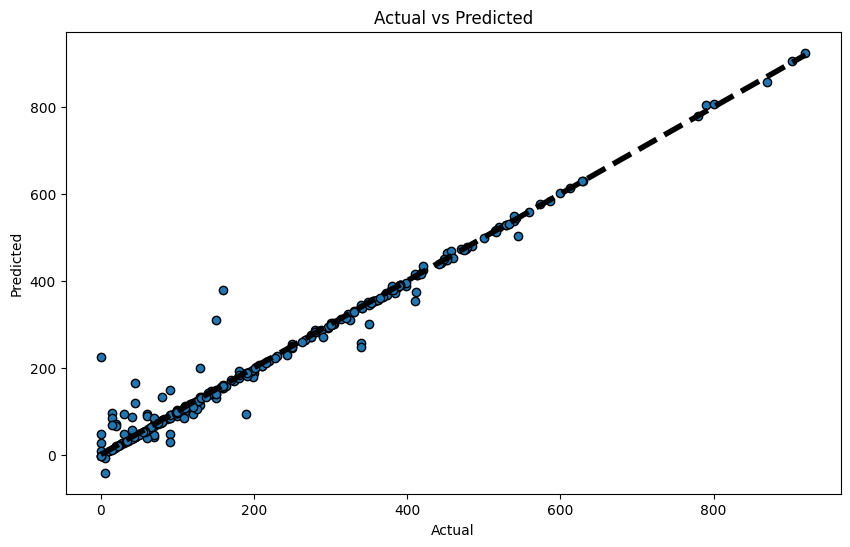

In [9]:
# Visualisasi hasil prediksi vs. nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()